In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from pathlib import Path

In [2]:
np.linspace(0, 5, 11).tolist()

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [3]:
df_path = Path('../financial_tests/sp500_vol_forecasts_2000_2024_v2.parquet')
df = pd.read_parquet(df_path)

to_drop = ['ret', 'close', 'open', 'high', 'low', 'var_check', 'lag']
df = df.drop(columns=to_drop)

df

,permno,y,lasso_0.05,ols,pred_cnn_100_muon,pred_cnn_100_adam,pred_cnn_100_sgd,pred_lstm_100_muon,pred_lstm_100_adam,pred_lstm_100_sgd,pred_mlp_100_muon,pred_mlp_100_adam,pred_mlp_100_sgd,pred_transformer_100_adam,pred_transformer_100_muon,pred_transformer_100_sgd,date
0,10104,0.003590,0.001659,0.002102,0.002456,0.002170,0.001498,0.002190,0.002128,0.001812,0.001839,0.002112,0.002043,0.002743,0.002369,0.002413,2000-05-25
1,10107,0.000747,0.000470,0.000537,0.000522,0.000505,0.000463,0.000455,0.000502,0.000566,0.000494,0.000524,0.000497,0.000501,0.000469,0.000521,2000-05-25
2,10138,0.000155,0.000532,0.000625,0.000610,0.000597,0.000800,0.000600,0.000608,0.000697,0.000683,0.000592,0.000621,0.000644,0.000614,0.000591,2000-05-25
3,10145,0.000422,0.000295,0.000330,0.000376,0.000346,0.000418,0.000331,0.000338,0.000330,0.000355,0.000338,0.000323,0.000354,0.000321,0.000336,2000-05-25
4,10147,0.001643,0.001472,0.001756,0.002627,0.002076,0.001243,0.001880,0.001975,0.001628,0.001520,0.001846,0.001871,0.002620,0.002258,0.002324,2000-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855196,93096,0.000071,0.000324,0.000341,0.000372,0.000324,0.000359,0.000319,0.000332,0.000390,0.000326,0.000339,0.000301,0.000333,0.000324,0.000339,2024-12-24
2855197,93132,0.000066,0.000234,0.000249,0.000225,0.000232,0.000269,0.000206,0.000237,0.000269,0.000240,0.000243,0.000230,0.000256,0.000239,0.000236,2024-12-24
2855198,93246,0.000117,0.000234,0.000251,0.000254,0.000243,0.000267,0.000226,0.000249,0.000259,0.000247,0.000235,0.000239,0.000239,0.000231,0.000241,2024-12-24
2855199,93429,0.000155,0.000174,0.000181,0.000179,0.000178,0.000192,0.000150,0.000170,0.000180,0.000176,0.000175,0.000177,0.000172,0.000168,0.000163,2024-12-24


In [4]:
feat_col = [c for c in df.columns if 'feature_' in c]
X = df[feat_col]

var_window = X.var(axis=1)

df['var_window'] = var_window

In [18]:
preds =  [c for c in df.columns if 'pred' in c] + ['ols', 'lasso_0.05']

y = df['y']

for p in preds:
    res_sq = (y - df[p])**2
    res = (y - df[p])
    df[f'{p}_res_sq'] = res_sq
    df[f'{p}_res'] = res

    print(p, np.var(res)/np.var(df[p]))


pred_cnn_100_muon 2.046824833306655
pred_cnn_100_adam 3.1049329886830157
pred_cnn_100_sgd 3.8398578910473966
pred_lstm_100_muon 2.9765367870020047
pred_lstm_100_adam 3.3894055758757595
pred_lstm_100_sgd 3.6169130409964696
pred_mlp_100_muon 4.015582761554036
pred_mlp_100_adam 3.424218659936989
pred_mlp_100_sgd 3.5221423794701363
pred_transformer_100_adam 2.230324627421188
pred_transformer_100_muon 2.6620393799286997
pred_transformer_100_sgd 2.656134215644772
pred_cnn_100_muon_res_sq 26379.034226133237
pred_cnn_100_muon_res 0.488561604997725
pred_cnn_100_adam_res_sq 23446.288166009508
pred_cnn_100_adam_res 0.3220681530743669
pred_cnn_100_sgd_res_sq 20872.357993315338
pred_cnn_100_sgd_res 0.2604262928341959
pred_lstm_100_muon_res_sq 23536.070114914222
pred_lstm_100_muon_res 0.33596091082710877
pred_lstm_100_adam_res_sq 22491.232945058615
pred_lstm_100_adam_res 0.29503699360452124
pred_lstm_100_sgd_res_sq 21395.818606421635
pred_lstm_100_sgd_res 0.2764788620774721
pred_mlp_100_muon_res_sq 

In [10]:
df

,permno,y,lasso_0.05,ols,pred_cnn_100_muon,pred_cnn_100_adam,pred_cnn_100_sgd,pred_lstm_100_muon,pred_lstm_100_adam,pred_lstm_100_sgd,...,pred_transformer_100_adam_res_sq,pred_transformer_100_adam_res,pred_transformer_100_muon_res_sq,pred_transformer_100_muon_res,pred_transformer_100_sgd_res_sq,pred_transformer_100_sgd_res,ols_res_sq,ols_res,lasso_0.05_res_sq,lasso_0.05_res
0,10104,0.003590,0.001659,0.002102,0.002456,0.002170,0.001498,0.002190,0.002128,0.001812,...,7.163533e-07,0.000846,1.491308e-06,0.001221,1.384930e-06,0.001177,2.212577e-06,0.001487,3.729250e-06,0.001931
1,10107,0.000747,0.000470,0.000537,0.000522,0.000505,0.000463,0.000455,0.000502,0.000566,...,6.076067e-08,0.000246,7.750230e-08,0.000278,5.134092e-08,0.000227,4.441988e-08,0.000211,7.717673e-08,0.000278
2,10138,0.000155,0.000532,0.000625,0.000610,0.000597,0.000800,0.000600,0.000608,0.000697,...,2.390701e-07,-0.000489,2.106361e-07,-0.000459,1.907844e-07,-0.000437,2.216224e-07,-0.000471,1.421811e-07,-0.000377
3,10145,0.000422,0.000295,0.000330,0.000376,0.000346,0.000418,0.000331,0.000338,0.000330,...,4.695044e-09,0.000069,1.027521e-08,0.000101,7.424803e-09,0.000086,8.505827e-09,0.000092,1.610500e-08,0.000127
4,10147,0.001643,0.001472,0.001756,0.002627,0.002076,0.001243,0.001880,0.001975,0.001628,...,9.553438e-07,-0.000977,3.781943e-07,-0.000615,4.637064e-07,-0.000681,1.275715e-08,-0.000113,2.918318e-08,0.000171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855196,93096,0.000071,0.000324,0.000341,0.000372,0.000324,0.000359,0.000319,0.000332,0.000390,...,6.913355e-08,-0.000263,6.433389e-08,-0.000254,7.200847e-08,-0.000268,7.332533e-08,-0.000271,6.423902e-08,-0.000253
2855197,93132,0.000066,0.000234,0.000249,0.000225,0.000232,0.000269,0.000206,0.000237,0.000269,...,3.595439e-08,-0.000190,2.988232e-08,-0.000173,2.883355e-08,-0.000170,3.362447e-08,-0.000183,2.818919e-08,-0.000168
2855198,93246,0.000117,0.000234,0.000251,0.000254,0.000243,0.000267,0.000226,0.000249,0.000259,...,1.494104e-08,-0.000122,1.312143e-08,-0.000115,1.530893e-08,-0.000124,1.809053e-08,-0.000135,1.365954e-08,-0.000117
2855199,93429,0.000155,0.000174,0.000181,0.000179,0.000178,0.000192,0.000150,0.000170,0.000180,...,2.952641e-10,-0.000017,1.724597e-10,-0.000013,5.761787e-11,-0.000008,6.996815e-10,-0.000026,3.803715e-10,-0.000020


In [11]:
clean = [c for c in df.columns if 'date' not in c]  
clean = [c for c in clean if 'feature' not in c]  
df[clean].var().sort_values()

pred_cnn_100_muon_res_sq            1.578856e-11
pred_transformer_100_adam_res_sq    1.634805e-11
pred_transformer_100_muon_res_sq    1.711379e-11
pred_transformer_100_sgd_res_sq     1.726064e-11
pred_lstm_100_muon_res_sq           1.768230e-11
pred_cnn_100_adam_res_sq            1.774928e-11
pred_mlp_100_sgd_res_sq             1.827876e-11
pred_mlp_100_adam_res_sq            1.847077e-11
pred_lstm_100_adam_res_sq           1.849824e-11
ols_res_sq                          1.869048e-11
pred_lstm_100_sgd_res_sq            1.943977e-11
pred_mlp_100_muon_res_sq            1.955563e-11
pred_cnn_100_sgd_res_sq             1.992418e-11
lasso_0.05_res_sq                   2.030868e-11
lasso_0.05                          5.292541e-08
pred_mlp_100_muon                   7.038146e-08
pred_cnn_100_sgd                    7.483125e-08
pred_mlp_100_sgd                    7.726195e-08
pred_lstm_100_sgd                   7.758315e-08
ols                                 7.993906e-08
pred_mlp_100_adam   

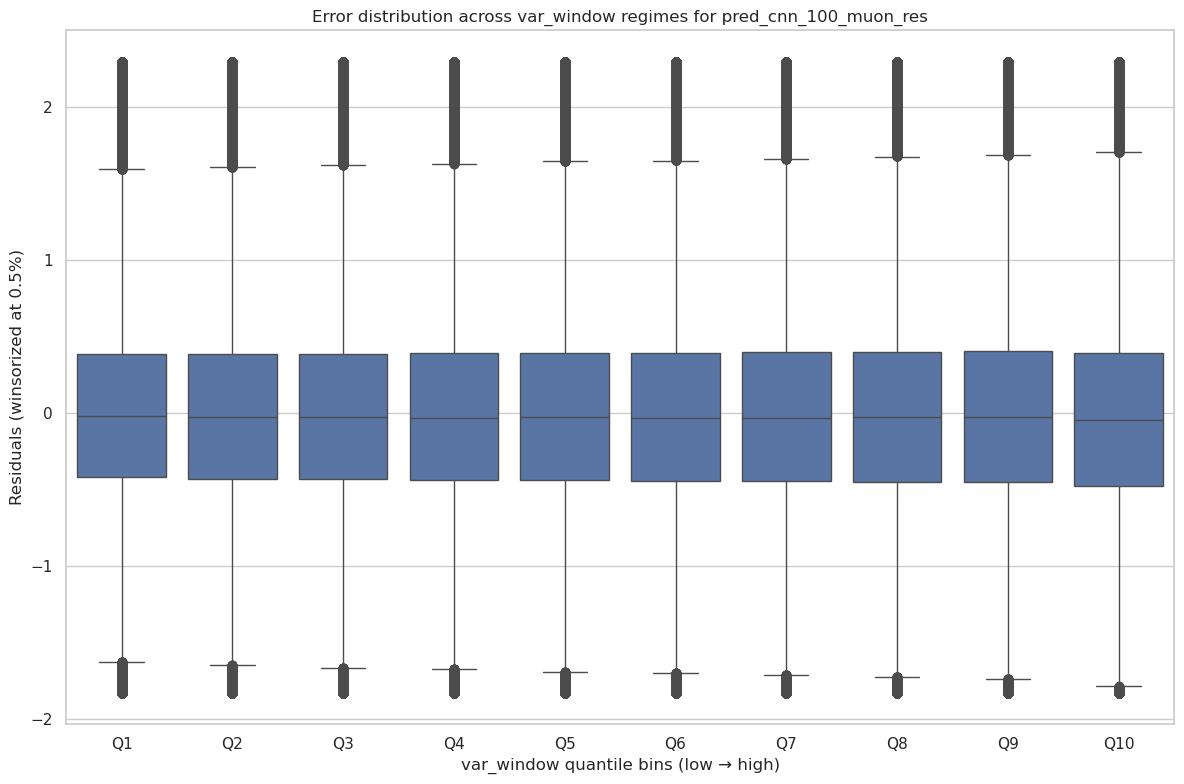


Spearman correlation: ρ = -0.008, p = 9.099e-44

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

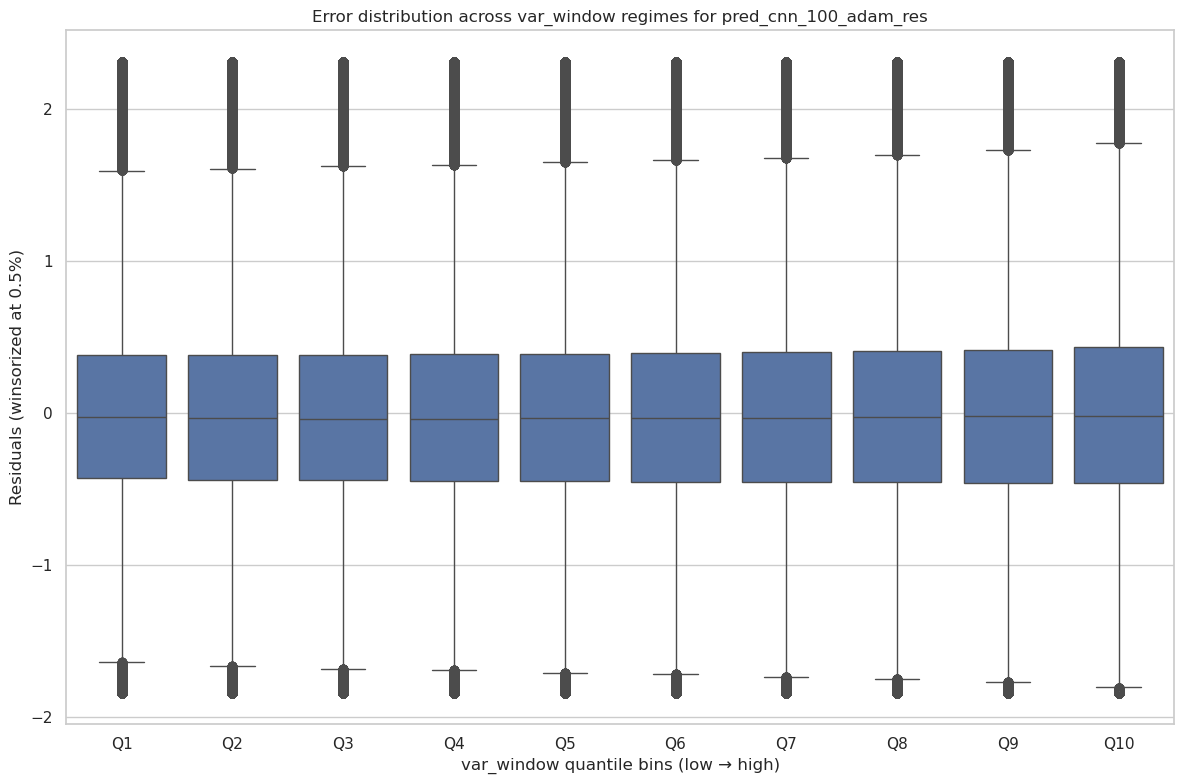


Spearman correlation: ρ = 0.003, p = 3.536e-08

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

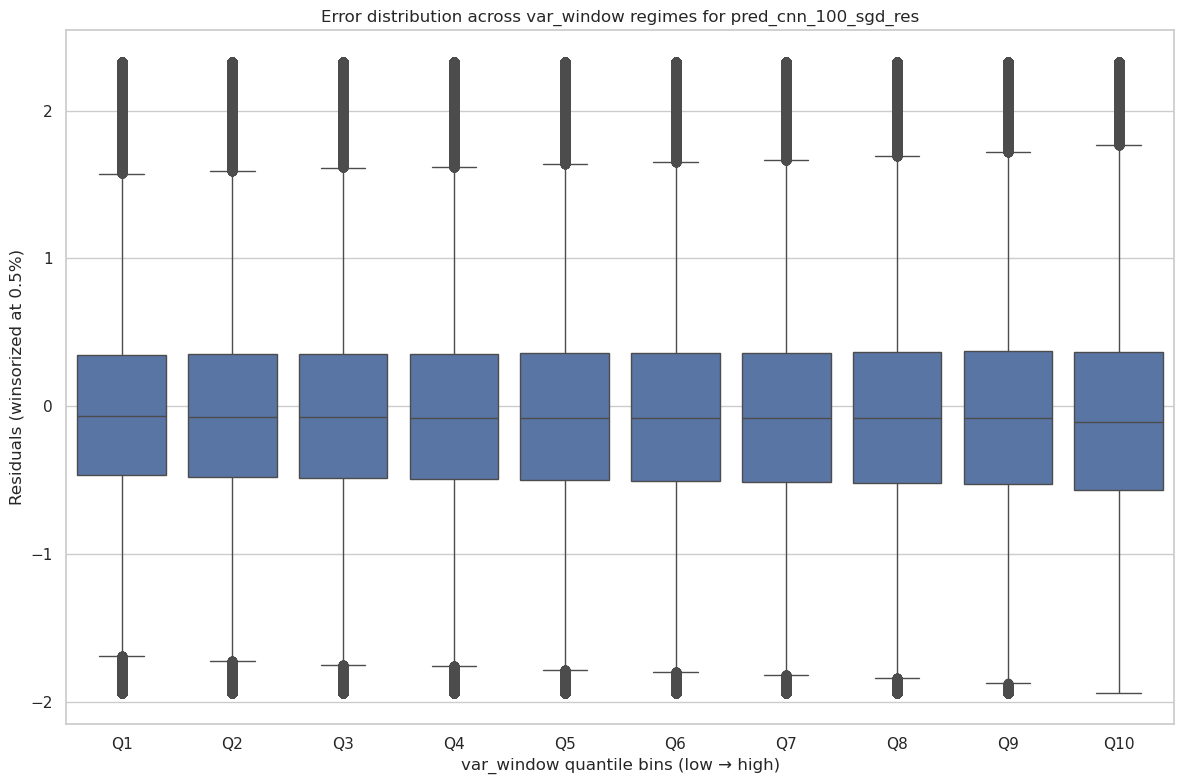


Spearman correlation: ρ = -0.015, p = 2.300e-139

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

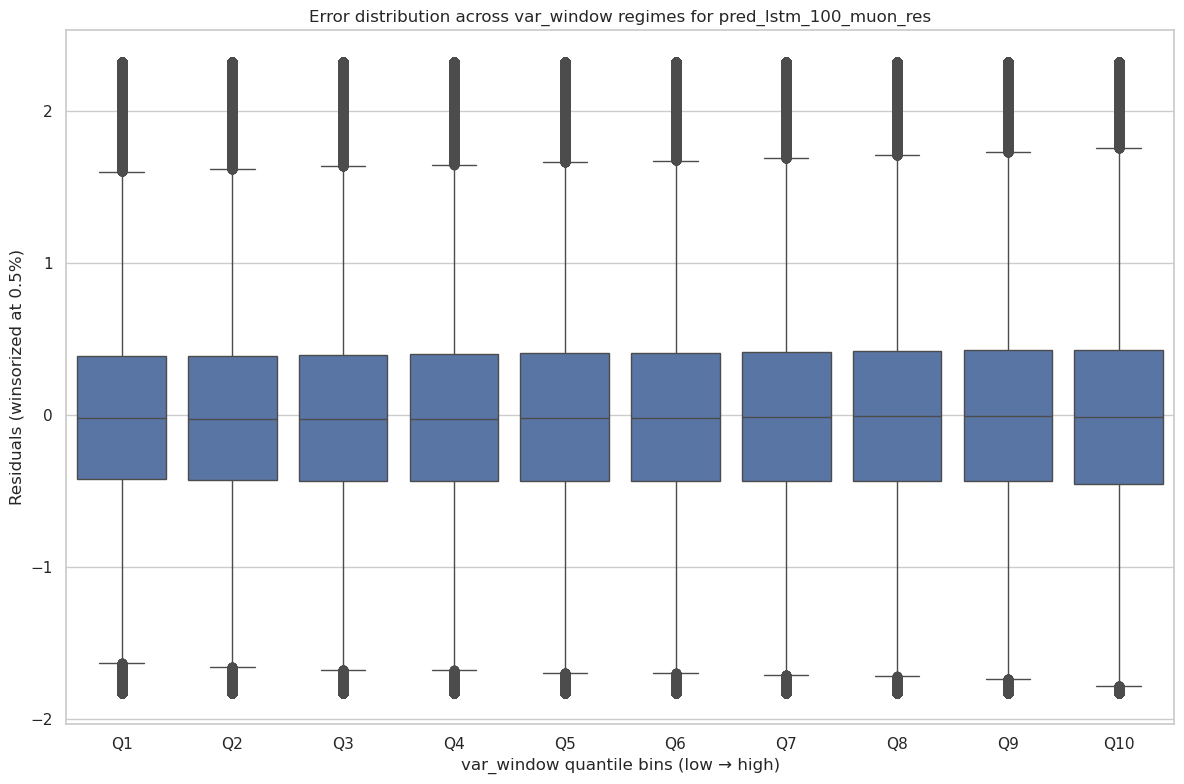


Spearman correlation: ρ = 0.005, p = 9.270e-20

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

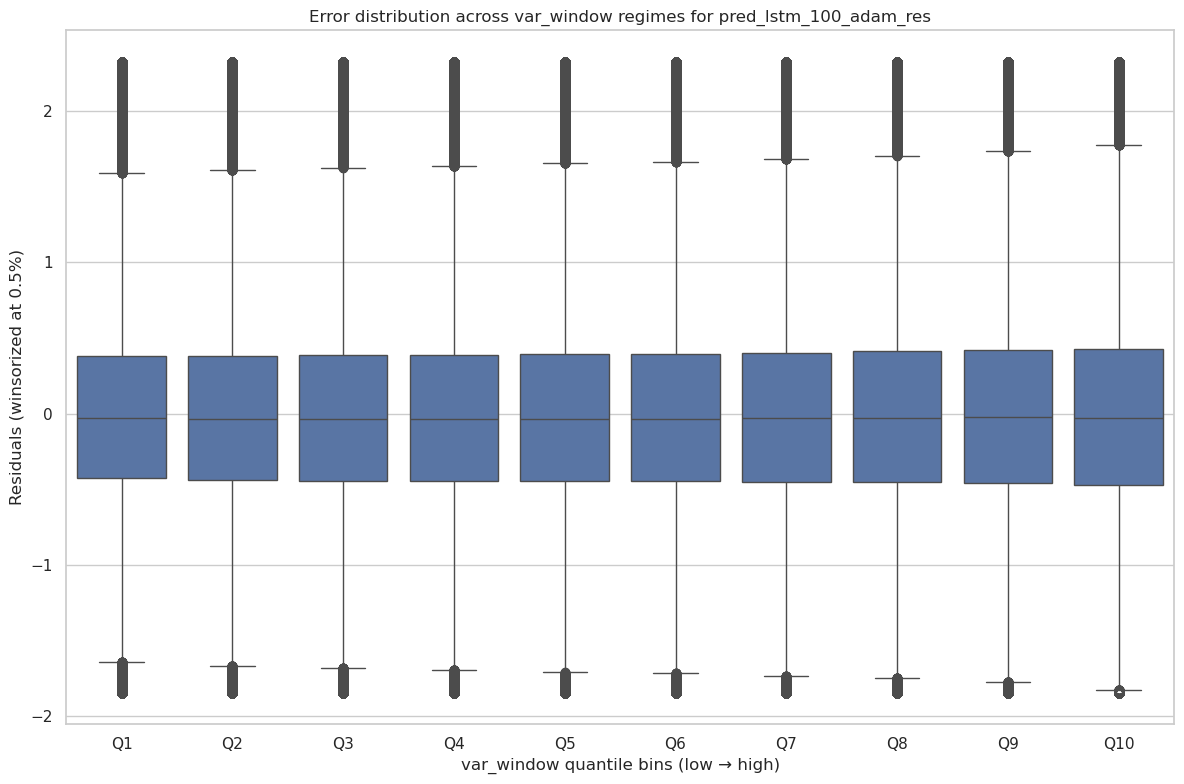


Spearman correlation: ρ = 0.002, p = 1.715e-04

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

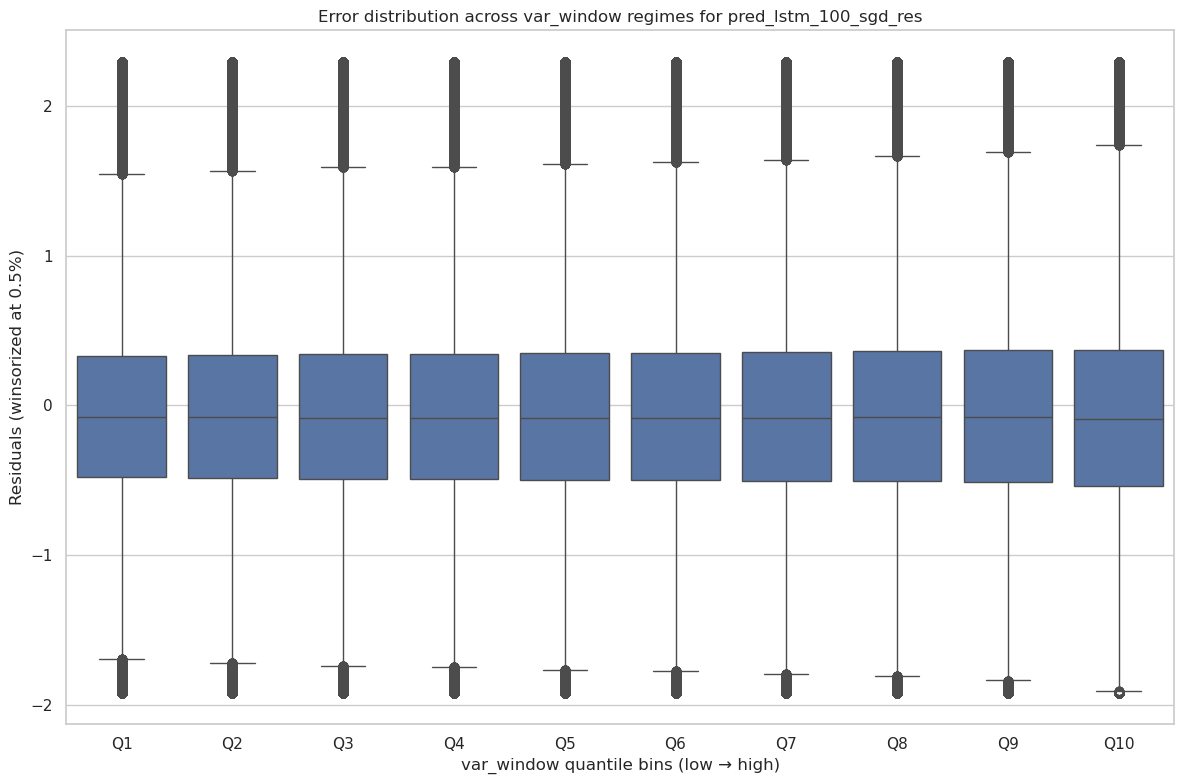


Spearman correlation: ρ = -0.003, p = 5.209e-08

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

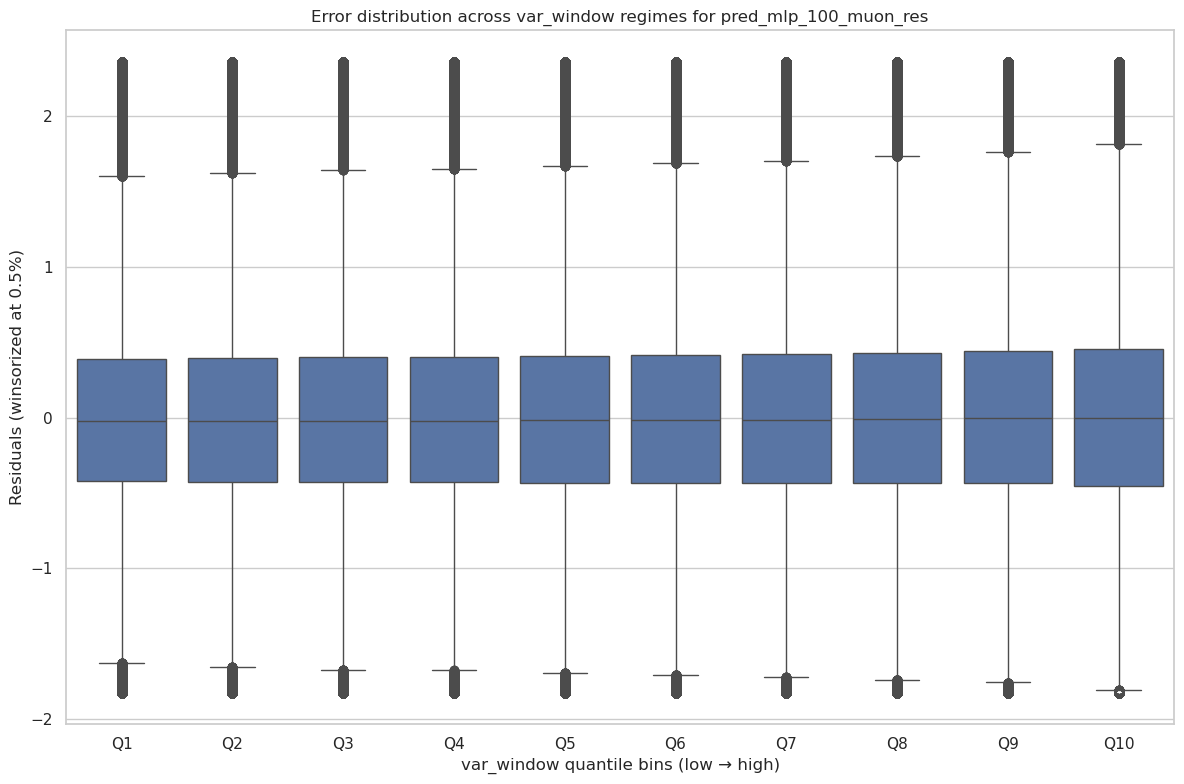


Spearman correlation: ρ = 0.008, p = 2.245e-41

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

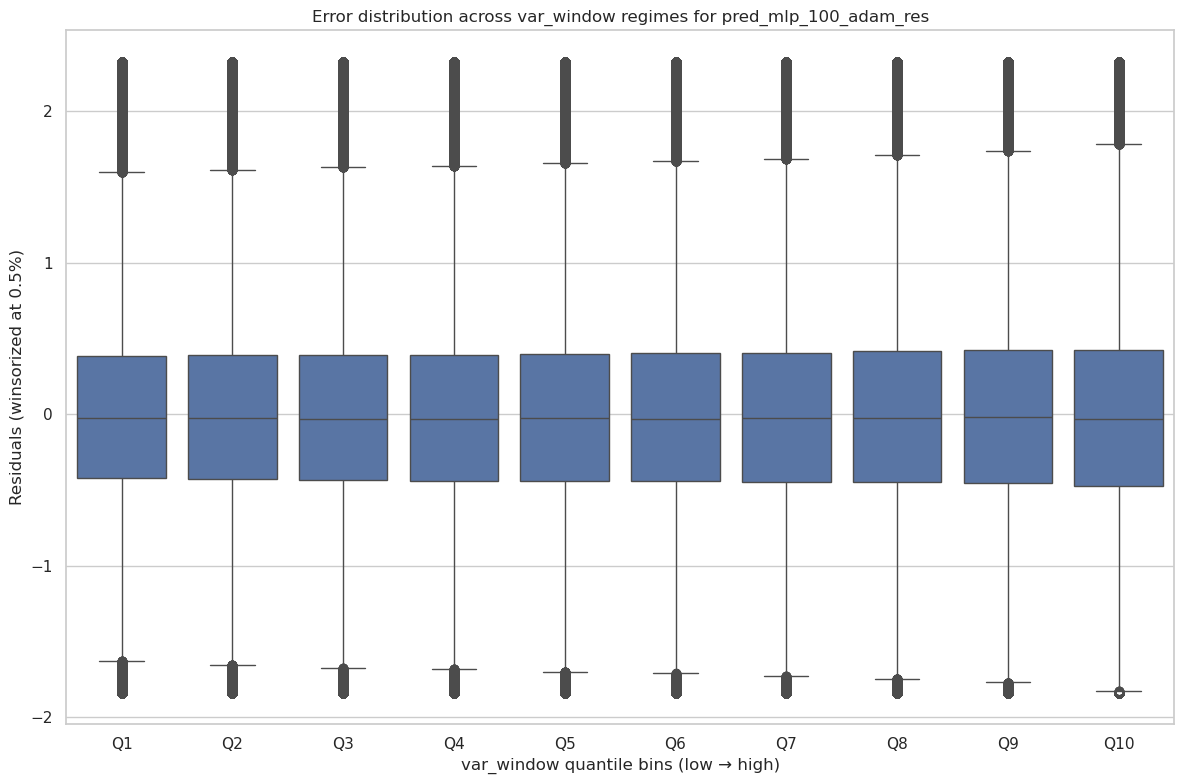


Spearman correlation: ρ = -0.001, p = 5.045e-02

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

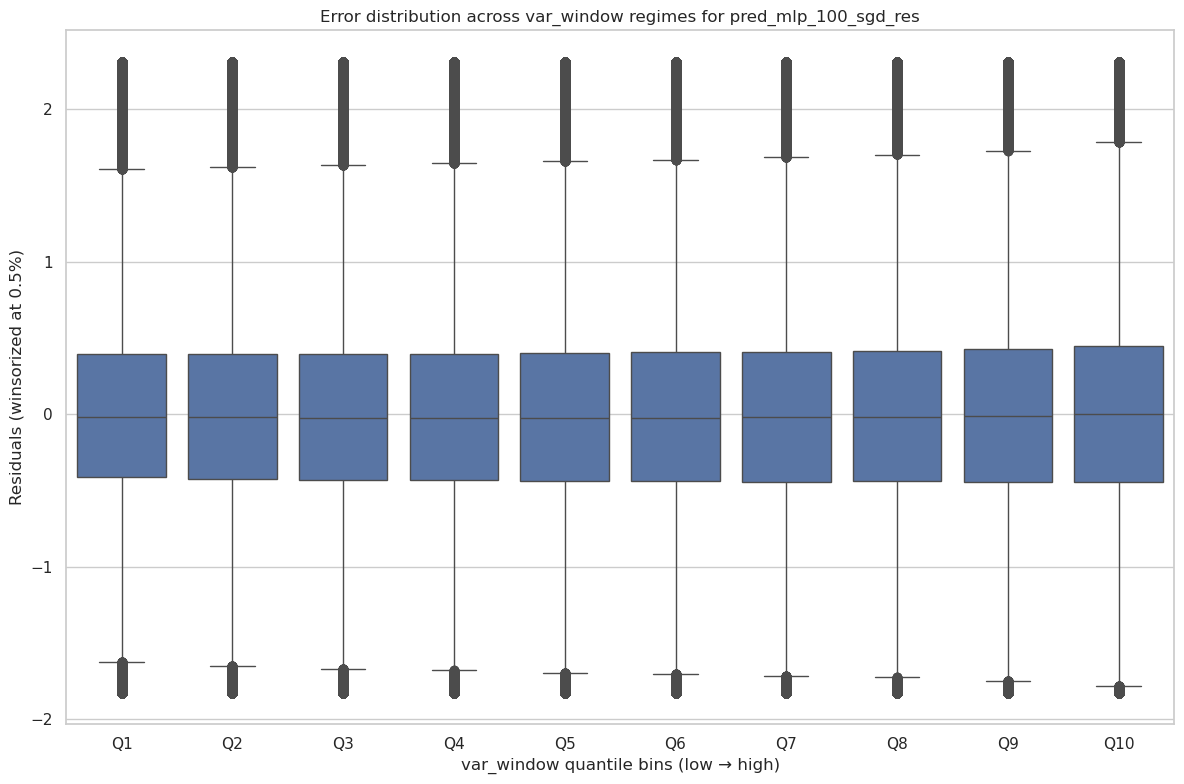


Spearman correlation: ρ = 0.004, p = 2.078e-12

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

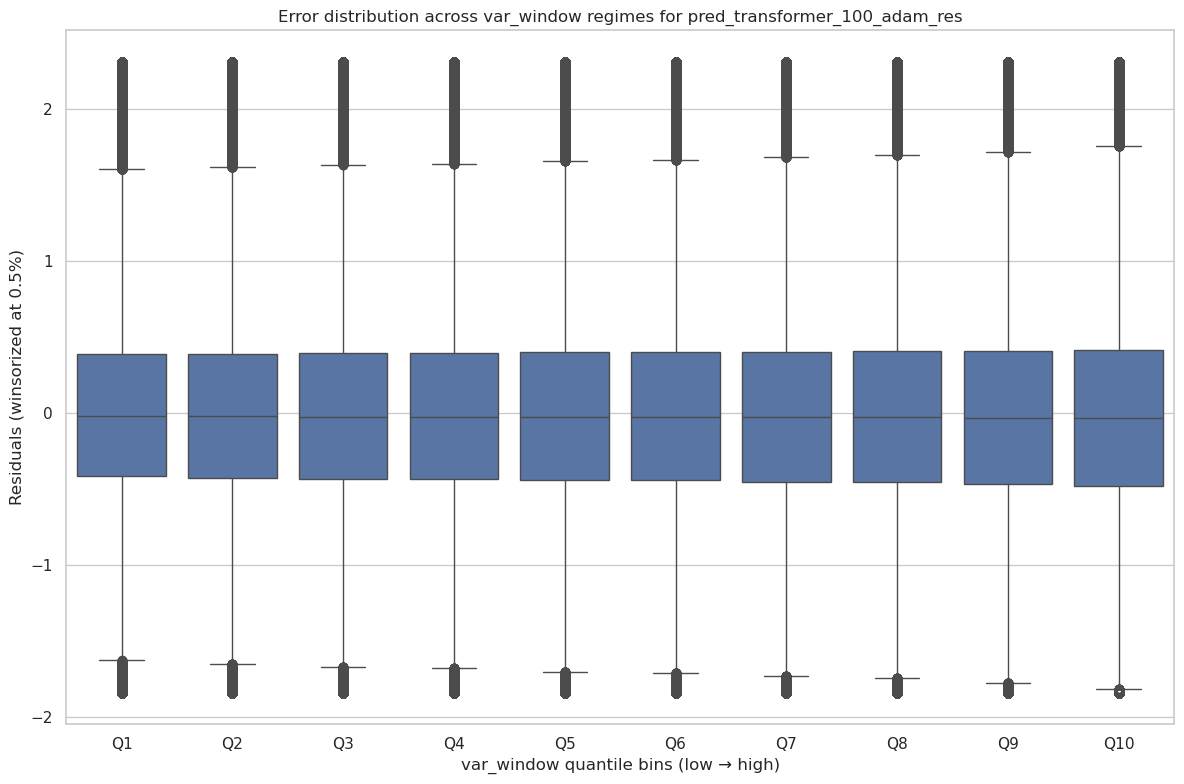


Spearman correlation: ρ = -0.008, p = 2.670e-42

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

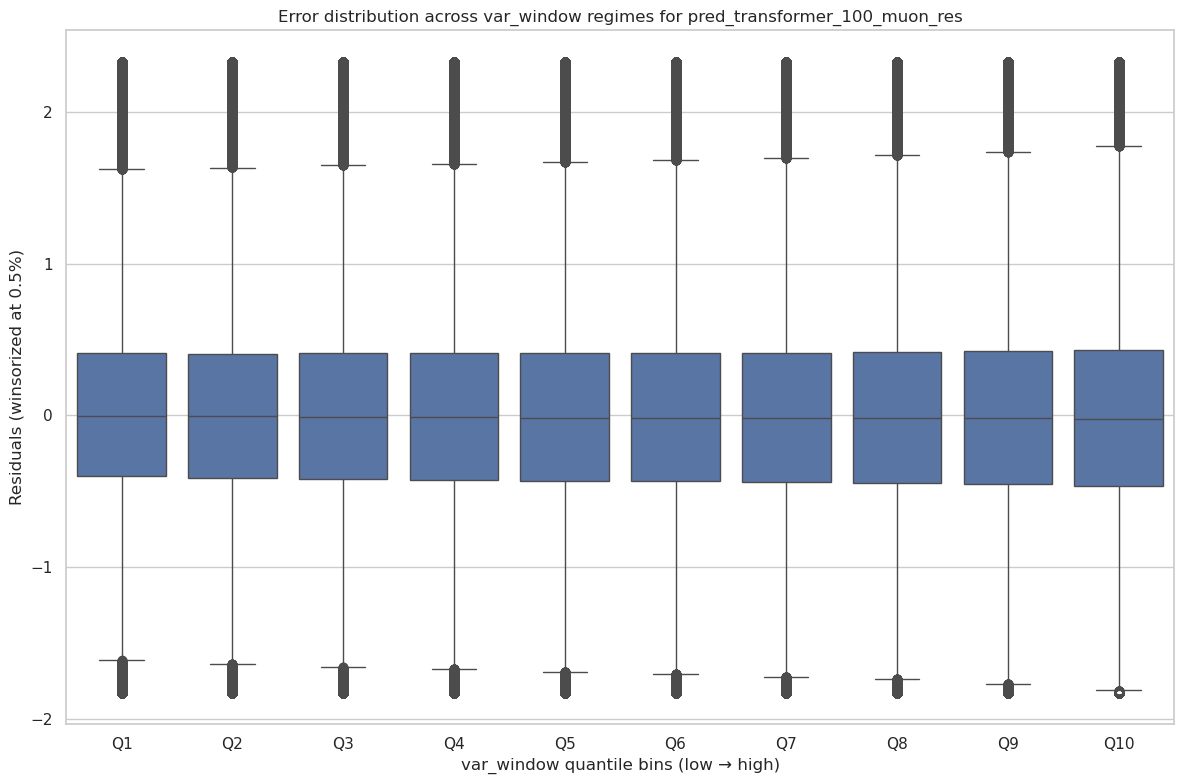


Spearman correlation: ρ = -0.010, p = 1.562e-60

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

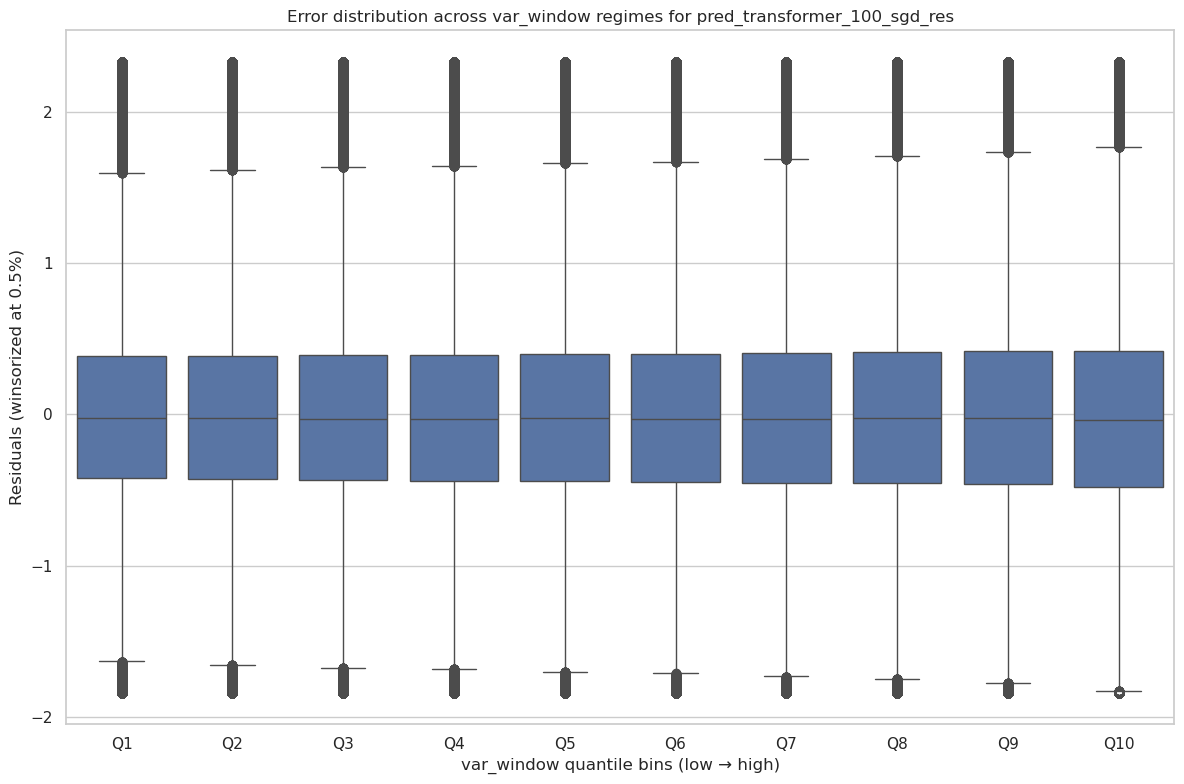


Spearman correlation: ρ = -0.004, p = 3.513e-14

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

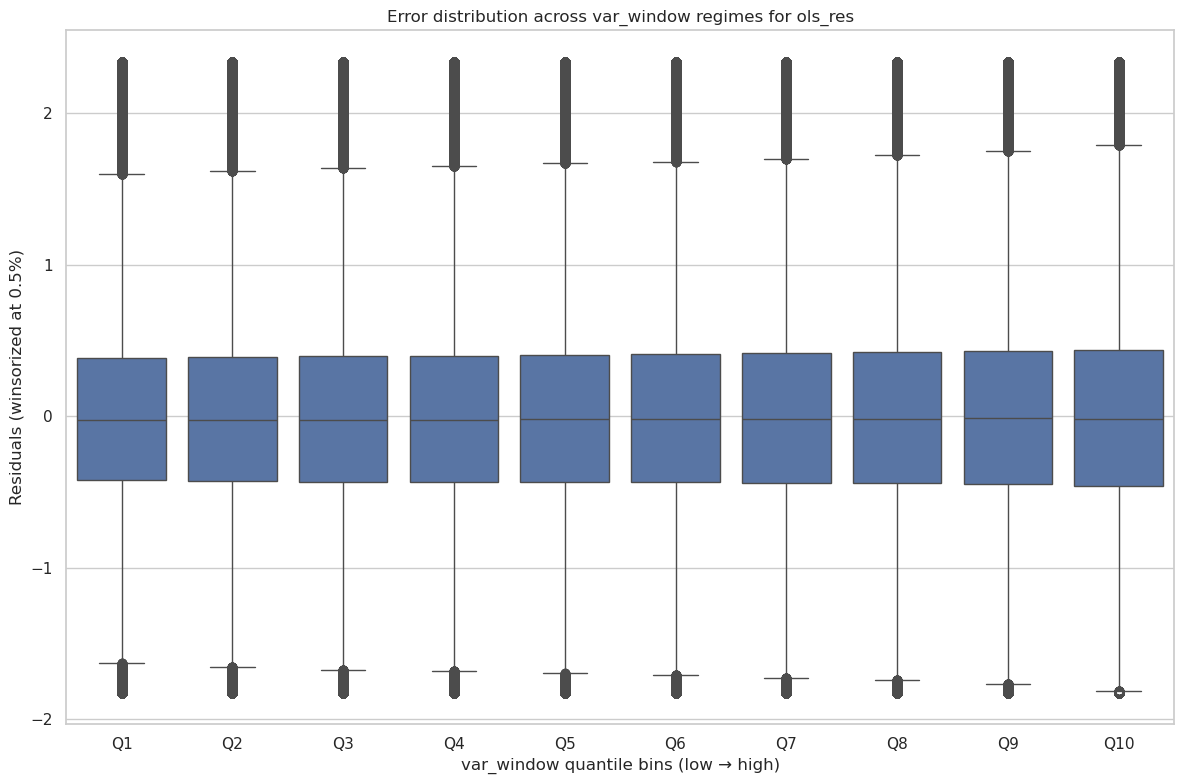


Spearman correlation: ρ = 0.003, p = 1.479e-06

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

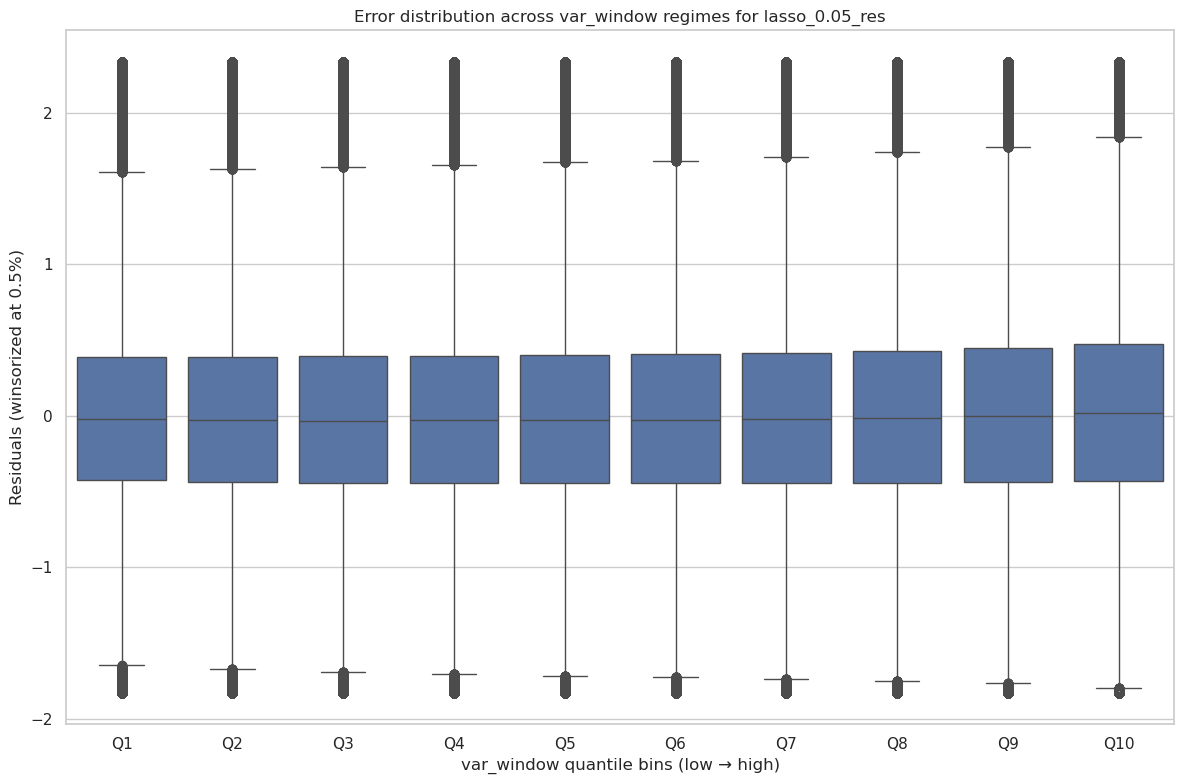


Spearman correlation: ρ = 0.017, p = 8.884e-176

Sample counts per bin:


/tmp/ipykernel_2288367/1426890292.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_plot.groupby('var_bin').describe())


               var_window                                                    \
                    count      mean       std       min       25%       50%   
var_bin                                                                       
(0.167, 0.341]   285498.0  0.309129  0.025789  0.168336  0.294396  0.315242   
(0.341, 0.376]   285498.0  0.359665  0.009971  0.341249  0.351229  0.360176   
(0.376, 0.404]   285498.0  0.390401  0.008152  0.376034  0.383363  0.390523   
(0.404, 0.431]   285498.0  0.417815  0.007829  0.404312  0.411028  0.417787   
(0.431, 0.459]   285498.0  0.445258  0.008047  0.431421  0.438302  0.445179   
(0.459, 0.49]    285498.0  0.474348  0.008893  0.459324  0.466625  0.474131   
(0.49, 0.528]    285498.0  0.508323  0.010881  0.490197  0.498837  0.507927   
(0.528, 0.579]   285498.0  0.552042  0.014701  0.528052  0.539174  0.551288   
(0.579, 0.666]   285498.0  0.617687  0.024951  0.579064  0.595734  0.615271   
(0.666, 4.766]   285498.0  0.823134  0.197711  0.666

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set_theme(style="whitegrid")

res_cols = [c for c in df.columns if 'res' in c]
res_cols = [c for c in res_cols if 'sq' not in c]


xcol = "var_window"
for r in res_cols:
    ycol = r

    # Clean data
    df_plot = df[[xcol, ycol]].dropna().copy()

    # Winsorize
    alpha = 0.005
    lower = df_plot[ycol].quantile(alpha/2)
    upper = df_plot[ycol].quantile(1-alpha/2)
    df_plot[ycol] = df_plot[ycol].clip(lower, upper)

    # Create 10 quantile bins
    q = 10
    df_plot["var_bin"] = pd.qcut(df_plot[xcol], q=q, duplicates="drop")

    # Create bin labels
    df_plot["bin_label"] = pd.Categorical(
        [f"Q{i+1}" for i in df_plot["var_bin"].cat.codes],
        categories=[f"Q{i+1}" for i in range(len(df_plot["var_bin"].cat.categories))],
        ordered=True
    )

    # Plot
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

    # Boxplots
    sns.boxplot(data=df_plot, x="bin_label", y=ycol, ax=ax1)
    ax1.set_xlabel(f"{xcol} quantile bins (low → high)")
    ax1.set_ylabel(f"Residuals (winsorized at {alpha*100}%)")
    ax1.set_title(f"Error distribution across {xcol} regimes for {r}")


    plt.tight_layout()
    plt.show()

    # Statistics
    spearman_r, spearman_p = stats.spearmanr(df_plot[xcol], df_plot[ycol])
    print(f"\nSpearman correlation: ρ = {spearman_r:.3f}, p = {spearman_p:.3e}")
    print(f"\nSample counts per bin:")
    print(df_plot.groupby('var_bin').describe())